Hi <br/>
I am A Sai Manoj, student at National Institute of Technology, Calicut.<br/>
In this Ipython notebook, I am going to train a TabNet which is especially designed for tabular data.
TabNet is a deep learning model designed by google which outperformed xgboost on many traditional tabular datasets.

In [7]:
#install tabnet
!pip install pytorch-tabnet

In [12]:
#importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

from pytorch_tabnet.tab_model import TabNetRegressor

import torch

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error


In [4]:
#this mounts my google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
#directories
train_dir = '/content/gdrive/My Drive/hackathon/Train_dataset.xlsx'
test_dir = '/content/gdrive/My Drive/hackathon/Test_dataset.xlsx'
#data
test_data =pd.read_excel(test_dir,'Test_Aug10')
train_data = pd.read_excel(train_dir)
#target column and features
target = 'Stock Price'
columns =['Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']
y=train_data[target]
train = train_data[columns]
test = test_data[columns]
test_indx = test_data['Stock Index']

#
cats=['Index', 'Industry']
noncats= ['VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio'] 
y=y.values

In [10]:
categorical_columns = []
categorical_dims =  {}
for col in cats:
    print(col, train[col].nunique())
    l_enc = LabelEncoder()#for converting string to int encode
    train[col] = train[col].fillna("VV_likely")
    test[col] = test[col].fillna("VV_likely")
    train[col] = l_enc.fit_transform(train[col].values)
    test[col] = l_enc.transform(test[col].values)
    categorical_columns.append(col)
    categorical_dims[col] = len(l_enc.classes_)# finding max number of label
uncat_means={}
#replacing missing values with averages
for col in noncats:
    m=train[col].mean()
    print(col,m)
    uncat_means[col]=m
    train[col]=train[col].fillna(m)

print(categorical_columns,categorical_dims)


Index 5
Industry 5
VWAP 486.1881674608574
General Index 24218.07919546701
NAV 54.746003824092035
P/E Ratio 105.5436228843193
Volumes Traded 10418269.156851733
Inventory Turnover 5.436839919816763
Covid Impact (Beta) 0.140653632082202
Tracking Error 0.03849604759299779
Dollar Exchange Rate 33.991103202846226
Put-Call Ratio 0.9447218416004379
P/B Ratio 4.996781734166905
['Index', 'Industry'] {'Index': 5, 'Industry': 5}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [11]:
print(train_data.columns)
print(train.head())
print(test.head())


Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')
   Index  Industry        VWAP  ...  Dollar Exchange Rate  Put-Call Ratio  P/B Ratio
0      3         4  700.290000  ...                   1.0        0.610000       9.20
1      3         2  214.520000  ...                   1.0        0.944722       6.91
2      3         2  943.420000  ...                   1.0        0.944722       6.09
3      0         3  828.130000  ...                  74.9        1.110000       5.60
4      4         4  486.188167  ...                   1.0        1.070000       9.46

[5 rows x 13 columns]
   Index  Industry    VWAP  ...  Dollar Exchange Rate  Put-Call Ratio  P/B Ratio
0      2         3   53.30  ...                  74.9        0.800000       4.66
1      1         0  74

In [14]:
features = [ col for col in train.columns] 
cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]
cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]
# define your embedding sizes : here just a random choice
cat_emb_dim = [5,5]

#splitting data
X_train, X_validation, y_train, y_validation = train_test_split(train, y, train_size=0.6, random_state=1234)
#categorical features
categorical_features_indices = np.where(train.dtypes != np.float)[0]


Validation on 40% data

In [15]:
#training tabnet
clf = TabNetRegressor(cat_dims=cat_dims, cat_emb_dim=cat_emb_dim, cat_idxs=cat_idxs)
max_epochs = 1000
clf.fit(
    X_train=X_train.values, y_train=y_train.reshape(-1, 1),
    X_valid=X_validation.values, y_valid=y_validation.reshape(-1, 1),
    max_epochs=max_epochs,
    patience=50,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

Device used : cpu
Will train until validation stopping metric hasn't improved in 50 rounds.
---------------------------------------
| EPOCH |  train  |   valid  | total time (s)
| 1     | -506497.75000 |  -463426.56250 |   0.7       
| 2     | -502761.12500 |  -444446.50000 |   1.1       
| 3     | -498325.31250 |  -419949.40625 |   1.6       
| 4     | -492791.21875 |  -379965.12500 |   2.1       
| 5     | -485764.03125 |  -340787.78125 |   2.6       
| 6     | -477229.34375 |  -333197.56250 |   3.1       
| 7     | -466949.18750 |  -295245.93750 |   3.6       
| 8     | -454459.71875 |  -275955.93750 |   4.1       
| 9     | -440867.00000 |  -236628.07812 |   4.5       
| 10    | -425852.90625 |  -210115.37500 |   5.0       
| 11    | -410444.40625 |  -205872.62500 |   5.5       
| 12    | -394101.09375 |  -187141.32812 |   6.0       
| 13    | -376313.50000 |  -163501.65625 |   6.4       
| 14    | -357850.25000 |  -149250.42188 |   6.9       
| 15    | -338625.00000 |  -133095.046

Below is the graph between actual and predicted values. we can observe it's almost in form of y=x which concludes that model is working fine

mse score on 40 percent data: 4806.152431377937
mae score on 40percent data: 20.000557112694455


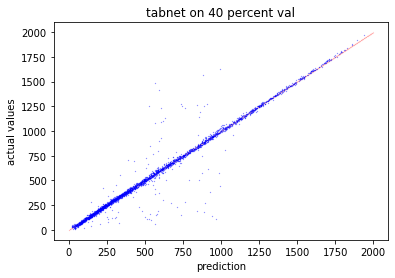

In [20]:
y_scores = clf.predict(X_validation.values)

score = mean_squared_error(y_validation, y_scores)
print("mse score on 40 percent data:",score)
score = mean_absolute_error(y_validation, y_scores)
print("mae score on 40percent data:",score)
nums = [ ]
for i in range(0,2000):
  nums.append(i)
plt.scatter(np.array(nums),np.array(nums), s=0.05, c='r', alpha=0.1)
plt.scatter(y_scores,y_validation, s=0.05, c='b', alpha=0.8)
plt.title("tabnet on 40 percent val")
plt.xlabel('prediction')
plt.ylabel('actual values')
#plt.savefig('/content/drive/My Drive/hack/data analysis/'+"catboost_regression_test_final"+'.jpg',)
plt.show()


Now to train it on 95 percent data

[0 1]
      Index  Industry    VWAP  ...  Dollar Exchange Rate  Put-Call Ratio  P/B Ratio
7122      4         4  742.79  ...                   1.0            1.16       7.03
882       2         1  520.62  ...                  74.9            0.99       6.92
4611      2         0  771.00  ...                  74.9            0.65       1.52
2065      3         2  118.04  ...                   1.0            0.89       0.67
1214      2         3  361.49  ...                  74.9            1.03       6.98

[5 rows x 13 columns]
      Index  Industry    VWAP  ...  Dollar Exchange Rate  Put-Call Ratio  P/B Ratio
3405      4         2  317.48  ...                   1.0            1.04       3.00
2483      0         4  376.60  ...                  74.9            0.85       6.27
4314      4         4  235.59  ...                   1.0            0.89       3.32
6793      4         3  137.68  ...                   1.0            1.17       1.41
3719      0         1  631.49  ...             

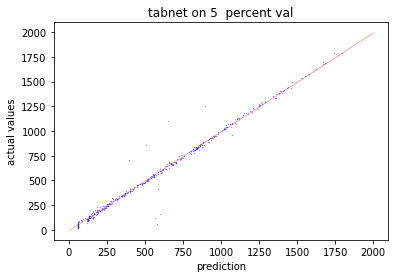

In [23]:
X_train, X_validation, y_train, y_validation = train_test_split(train, y, train_size=0.95, random_state=34)

categorical_features_indices = np.where(train.dtypes != np.float)[0]
print(categorical_features_indices)


print(X_train.head())
print(X_validation.head())

print(test.head())
print(test_indx.head())
clf = TabNetRegressor(cat_dims=cat_dims, cat_emb_dim=cat_emb_dim, cat_idxs=cat_idxs)
max_epochs = 1000
clf.fit(
    X_train=X_train.values, y_train=y_train.reshape(-1, 1),
    X_valid=X_validation.values, y_valid=y_validation.reshape(-1, 1),
    max_epochs=max_epochs,
    patience=50,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    drop_last=False)
y_scores = clf.predict(X_validation.values)
from sklearn.metrics import roc_auc_score,mean_squared_error,mean_absolute_error

score = mean_squared_error(y_validation, y_scores)
print("mse score on 5  percent data:",score)
score = mean_absolute_error(y_validation, y_scores)
print("mae score on 5 percent data:",score)
# to check the fit on 5 percent validation we plot yscores vs yvalidation and see how much it follows y=x line

a=[]
for i in range(0,2000):
  a.append(i)
plt.scatter(np.array(a),np.array(a), s=0.05, c='r', alpha=0.1)
plt.scatter(y_scores,y_validation, s=0.05, c='b', alpha=0.8)
plt.title("tabnet on 5  percent val")
plt.xlabel('prediction')
plt.ylabel('actual values')
plt.savefig('/content/gdrive/My Drive/hackathon/'+"tabnet_regression_test_final"+'.jpg',)
plt.show()    

In [24]:
# testing data and sumbmition file <create new folder> 
print(test.head())
print(test_indx.head())

   Index  Industry    VWAP  ...  Dollar Exchange Rate  Put-Call Ratio  P/B Ratio
0      2         3   53.30  ...                  74.9        0.800000       4.66
1      1         0  749.34  ...                  17.7        0.860000       6.11
2      4         2  567.75  ...                   1.0        0.930000       4.99
3      2         1  646.78  ...                  74.9        1.090000       1.26
4      3         3  380.33  ...                   1.0        0.944722       6.18

[5 rows x 13 columns]
0    AC3235
1    AC3236
2    AC3237
3    AC3238
4    AC3239
Name: Stock Index, dtype: object


In [25]:
y_scores = clf.predict(test.values)

In [26]:
sub = pd.DataFrame()
sub['Stock Index']=test_indx
sub['Stock Price'] = y_scores

In [28]:
sub.to_csv('/content/gdrive/My Drive/hackathon/file01.csv',index=False)

  Stock Index  Stock Price
0      AC3235   825.474609
1      AC3236   261.880310
2      AC3237  1569.978027
3      AC3238   812.313171
4      AC3239   277.640686


# PART 02
We are going to use the above trained tabnet to predict the stock price from the updated data which is obtained from RNN model.

In [31]:
#directories
que_dir = '/content/gdrive/My Drive/hackathon/test_data_from_rnn.csv'
#data

data = pd.read_csv(que_dir)

columns =['Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']
train_ = data[columns]


cats=['Index', 'Industry']
uncats= ['VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio'] 

categorical_columns = []
categorical_dims =  {}
for col in cats:
    print(col, train_[col].nunique())
    l_enc = LabelEncoder()#for converting string to int encode
    train_[col] = train_[col].fillna("VV_likely")
    train_[col] = l_enc.fit_transform(train_[col].values)
    categorical_columns.append(col)
    categorical_dims[col] = len(l_enc.classes_)# finding max number of label
uncat_means={}
#replacing missing values with averages
for col in uncats:
    m=train_[col].mean()
    print(col,m)
    uncat_means[col]=m
    train_[col]=train_[col].fillna(m)

print(categorical_columns,categorical_dims)


Index 5
Industry 5
VWAP 488.5725881289544
General Index 25099.383679738847
NAV 54.25719568062827
P/E Ratio 104.73162882527161
Volumes Traded 10183084.70514773
Inventory Turnover 5.42287185701302
Covid Impact (Beta) 0.1390818181818157
Tracking Error 0.0383399375975039
Dollar Exchange Rate 33.45950439146698
Put-Call Ratio 1.2728163383848692
P/B Ratio 5.0025430629502035
['Index', 'Industry'] {'Index': 5, 'Industry': 5}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [33]:

stock_prices = clf.predict(train_.values)

In [40]:
index = data['Stock Index']
sub = pd.DataFrame()
sub['Stock Index']=index
sub['Stock Price'] = stock_prices

In [41]:
train_.head()

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,2,3,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.913884,4.66
1,1,0,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,1.067779,6.11
2,4,2,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,1.272579,4.99
3,2,1,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.666919,1.26
4,3,3,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,1.862781,6.18


In [43]:
sub.head()

,Stock Index,Stock Price
0,AC3235,825.240967
1,AC3236,261.659363
2,AC3237,1569.978027
3,AC3238,807.864990
4,AC3239,279.847931


In [44]:
sub.to_csv('/content/gdrive/My Drive/hackathon/task02.csv')

In [46]:
clf.save_model('/content/gdrive/My Drive/hackathon/tabnet')

Successfully saved model at /content/gdrive/My Drive/hackathon/tabnet.zip


'/content/gdrive/My Drive/hackathon/tabnet.zip'